## Logistic Regression Assignment
In this assignment you will be working with the "Breast Cancer Wisconsin Dataset" from sklearn package and use logistic regression to predict whether a lump found is malignant or benign.
#### Let's get started!

In [2]:
# you will not need other libraries than these so leave this cell as is 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Loading the dataset (as numpy arrays) into X and y:

In [3]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names']

# by running this we see that X is a numpy array(so is y)
print(type(X))
# this shows you number of rows and columns(features) in our data
print(X.shape)
print(y.shape)
print((feature_names).shape)
print(X)

<class 'numpy.ndarray'>
(569, 30)
(569,)
(30,)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Next, convert the numpy arrays we have extracted into a single pandas dataframe (name the y column as 'Target') and use head() to look at what the dataset contains. <br>
You're free to check other info too, maybe the datatypes in each column or whether there are any null values, <br>
It's always a good idea to get to know the type of data you'll be working with

In [4]:
df=pd.DataFrame(X)
df.columns=feature_names
print(type(df))
print(df)
#print(df.dtypes)
'''ch=97
L=[]
for i in range(30):
    L.append(chr(ch+i))
col=np.array(L)
df.columns=col'''
df['Target']=y

<class 'pandas.core.frame.DataFrame'>
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  me

### Visualization using pandas <br>
As an example, here I have dispalyed the number of benign and malignant tumors as a bargraph <br>
Feel free to try out various plots to find other insights from the data

<AxesSubplot:>

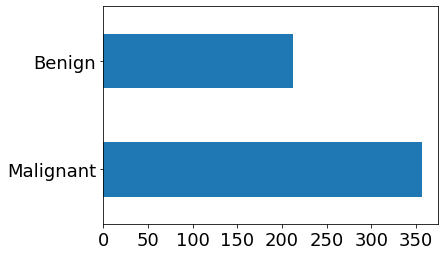

In [5]:
df['Target'].value_counts().rename(index = {0:"Benign", 1:"Malignant"}).plot.barh(fontsize = 18)

Perform minmax scaling (from scratch) to scale features in X<br>
Note that we'll be working with the numpy arrays from here, not the pandas dataframe


In [6]:
Sc=[]
for i in range(len(X)):
    Sc.append([])
Xt=np.transpose(X)
for C in range(30):
    k=0
    M,m=max(Xt[C]),min(Xt[C])
    for i in Xt[C]:
        x=(i-m)/(M-m)
        Sc[k].append(x)
        k+=1
X_scaled=np.array(Sc)
print(np.shape(X_scaled))

(569, 30)


Splitting data into test and train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
# as the below statement will show when run, the above statement just splits the data so that 1/3 of it is in the test set and the rest is training
print("Training examples: ", X_train.shape[0]," Testing examples: ", X_test.shape[0])

Training examples:  381  Testing examples:  188


From here on out, keep in mind that the inputs will be a np array! <br>
So here, the function will return a np array of the same size with sigmoid function applied to each element

In [8]:

def sigmoid(z):
    arr=1/(1+np.exp(-z))
    return arr

look up the hypothesis function for logistic regression <br>
Basically the predicted value, given input and weights

In [9]:
def hypo(X, weights):
    return (sigmoid(np.dot(X,weights)))

In [10]:
def cost(y, y_pred):
    loss = -(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    cost = sum(loss)/len(loss)
    return cost

Perform one step of gradient descent and return the updated weights

In [11]:
def gradient_descent_step(weights, X, y, y_pred, alpha):
    dw=np.dot(np.transpose(X),(y_pred-y))/len(X)
    weights-=alpha*dw
    return weights


In [12]:
def train(X, y, iterations = 50, alpha=0.1):
    # have a list of costs to use to plot cost function
    costs = []
    #initialize weights to a column np array of size = number of features
    weights=np.zeros(np.shape(X)[1])
    for i in range(iterations):
        # calculate y_pred using hypo()
        y_pred=hypo(X,weights)
        # calculate costi (cost at ith iteration)
        costi = cost(y,y_pred)
        costs.append(costi)
        # update weights using gradient descent
        weights = gradient_descent_step(weights,X,y,y_pred,alpha)
        
        
        if (4*(i+1))%iterations==0:
            print("cost after %i %% iterations: %f"%((i+1)*100/iterations,costi) )
            
    return weights, costs

cost after 25 % iterations: 0.138621
cost after 50 % iterations: 0.113569
cost after 75 % iterations: 0.101213
cost after 100 % iterations: 0.093461


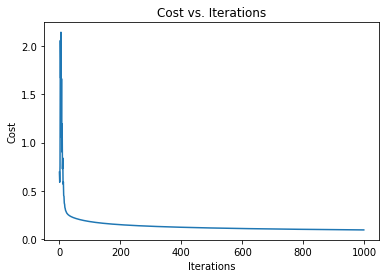

In [13]:
wf, c = train(X_train, y_train, iterations = 1000, alpha=10) # you can tweak the parameters here
plt.plot(range(len(c)), c)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

In [14]:
def predict(X, weights):
    predictions=[]
    for i in hypo(X,weights):
        if i>0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return (np.array(predictions))
    #return column vector of predictions: 1 for malignant, 0 for benign  

Find accuracy and additionally, write another function to find the f1 score (another evaluation metric) and calculate that on the train and test data

In [15]:
def accuracy(y, y_pred):
    diff=(y-y_pred)**2
    c=0
    for i in diff:
        if i==0:
            c+=1
    return (c/len(diff))


In [16]:
def f1_score(y,y_pred):
    c=t=0
    for i in range(len(y)):
        if y[i]==1:
            if y_pred[i]==1:
                c+=1
            t+=1
    prec=c/t
    recall=c/len(y)
    return 2*(recall*prec)/(recall+prec)
            

In [17]:
pred_train = predict(X_train, wf)
pred_test = predict(X_test, wf)


Try tweaking the parameters alpha and iterations till you get an accuracy of at least 95% for both test and train data <br>
After that see how high you can push it

In [18]:
print("Accuracy for train data: ", accuracy(y_train, pred_train))
print("Accuracy for test data: ", accuracy(y_test, pred_test))

Accuracy for train data:  0.968503937007874
Accuracy for test data:  0.9414893617021277


In [19]:
print("F1 score of train data:",f1_score(y_train,pred_train))
print("F1 score of test data:",f1_score(y_test,pred_test))

F1 score of train data: 0.752025931928687
F1 score of test data: 0.7572815533980582
